In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day25-normalization/wine_data.csv",header=None,usecols=[0,1,2])
df.columns=['class label','Alcohol','Malic acid']

In [21]:
df

,class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

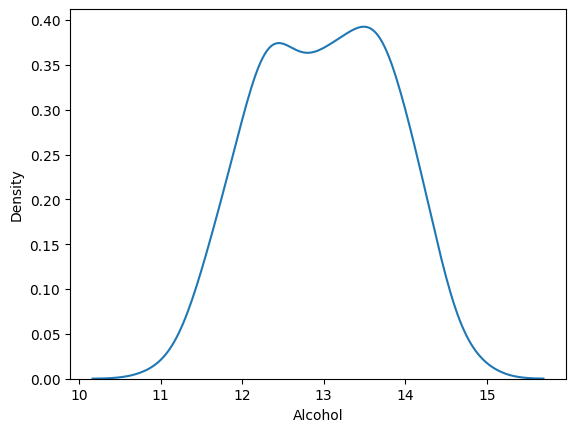

In [22]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

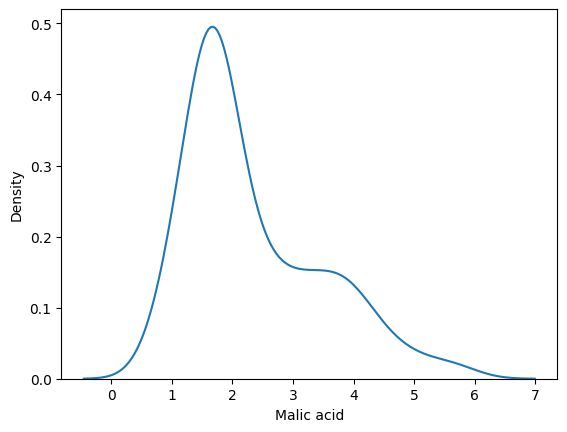

In [23]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

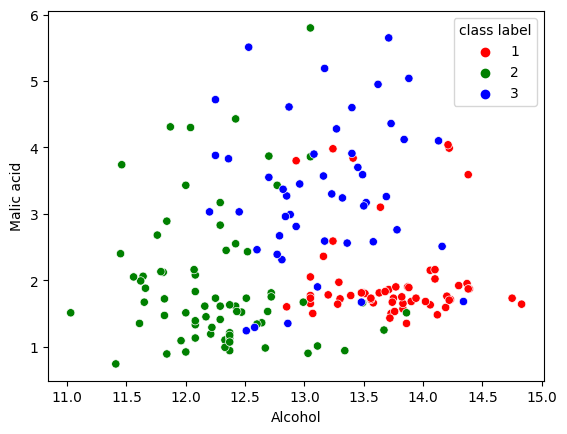

In [24]:
sns.scatterplot(x=df['Alcohol'], y=df['Malic acid'], hue=df['class label'], palette=color_dict)


In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('class label', axis=1), df['class label'], test_size=0.3, random_state=0)
x_train.shape, x_test.shape


((124, 2), (54, 2))

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scaler.fit(x_train)

x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [31]:
x_train_scaled=pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [33]:
x_train_scaled

,Alcohol,Malic acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252
...,...,...
119,0.212366,0.174370
120,0.360215,0.058824
121,0.373656,0.151261
122,0.771505,0.165966


In [34]:
x_test_scaled

,Alcohol,Malic acid
0,0.728495,0.163866
1,0.473118,0.373950
2,0.360215,0.050420
3,0.680108,0.176471
4,0.543011,1.031513
5,0.142473,0.243697
6,0.814516,0.264706
7,0.357527,0.617647
8,0.327957,0.176471
9,0.282258,0.197479


In [32]:
np.round(x_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [35]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


Text(0.5, 1.0, 'after scaling')

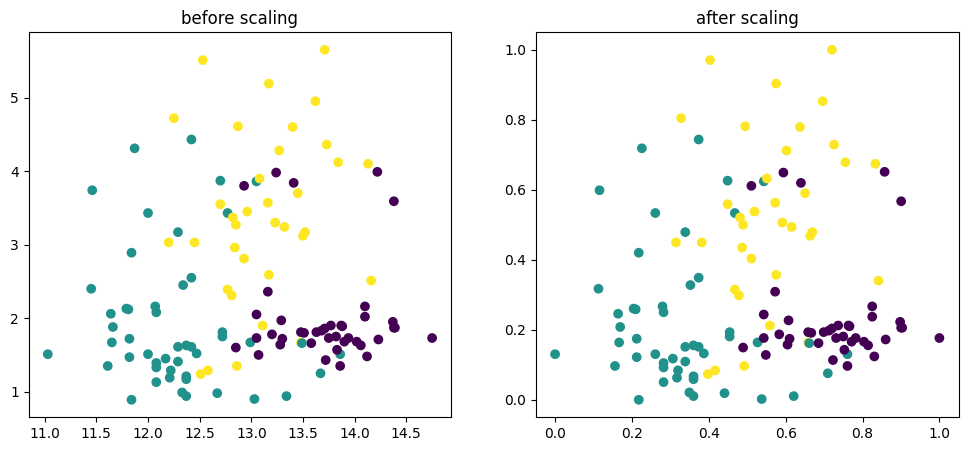

In [38]:
fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(x_train['Alcohol'],x_train['Malic acid'],c=y_train)
ax1.set_title("before scaling")
ax2.scatter(x_train_scaled['Alcohol'],x_train_scaled['Malic acid'],c=y_train)
ax2.set_title("after scaling")

<Axes: title={'center': 'before scaling'}, xlabel='Alcohol', ylabel='Density'>

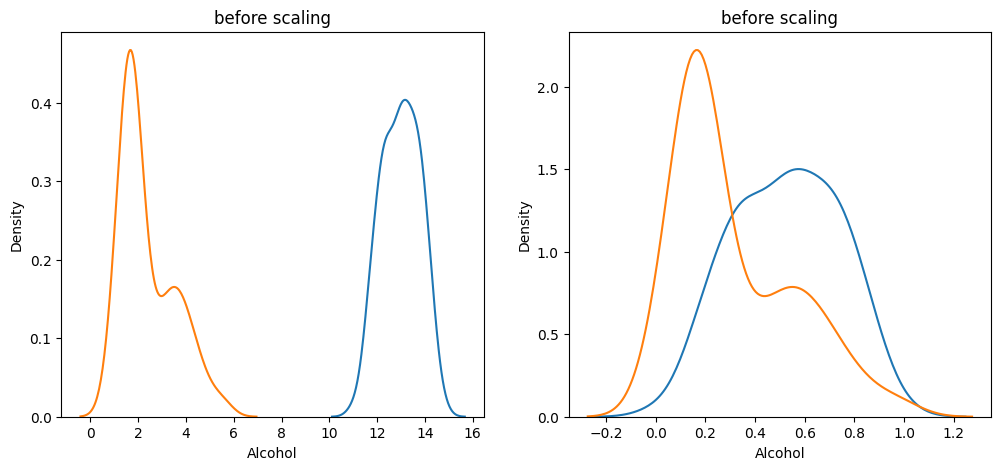

In [40]:
fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
#before scaling
ax1.set_title("before scaling")
sns.kdeplot(x_train['Alcohol'],ax=ax1)
sns.kdeplot(x_train['Malic acid'],ax=ax1)

#after scaling
ax2.set_title("before scaling")
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(x_train_scaled['Malic acid'],ax=ax2)



<Axes: title={'center': 'before scaling'}, xlabel='Alcohol', ylabel='Density'>

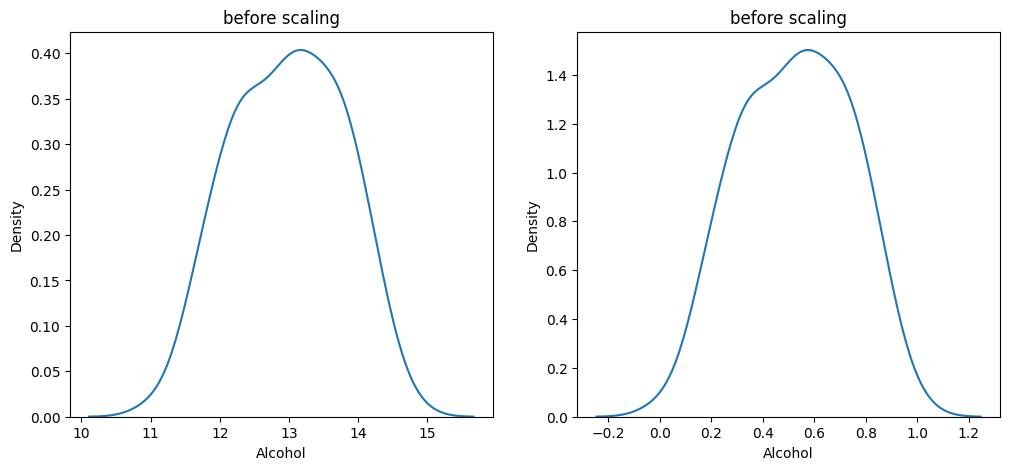

In [41]:
fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
#before scaling
ax1.set_title("before scaling")
sns.kdeplot(x_train['Alcohol'],ax=ax1)


#after scaling
ax2.set_title("before scaling")
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)



<Axes: title={'center': 'before scaling'}, xlabel='Malic acid', ylabel='Density'>

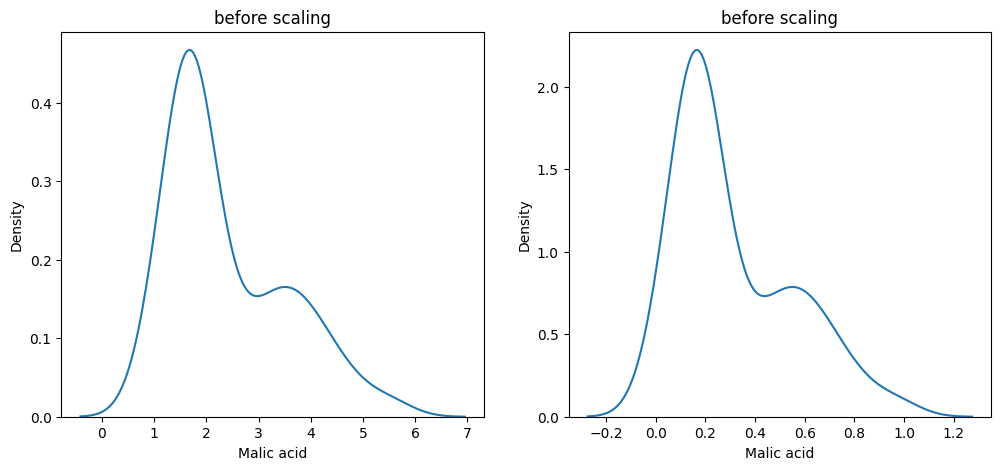

In [42]:
fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
#before scaling
ax1.set_title("before scaling")

sns.kdeplot(x_train['Malic acid'],ax=ax1)

#after scaling
ax2.set_title("before scaling")

sns.kdeplot(x_train_scaled['Malic acid'],ax=ax2)
